In [2]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Load the first 10,000 rows of the dataset
df = pd.read_csv('reviews.csv', nrows=10000)

# Text preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text

# Apply preprocessing to the 'Text' column
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Display the first few rows of the dataset
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


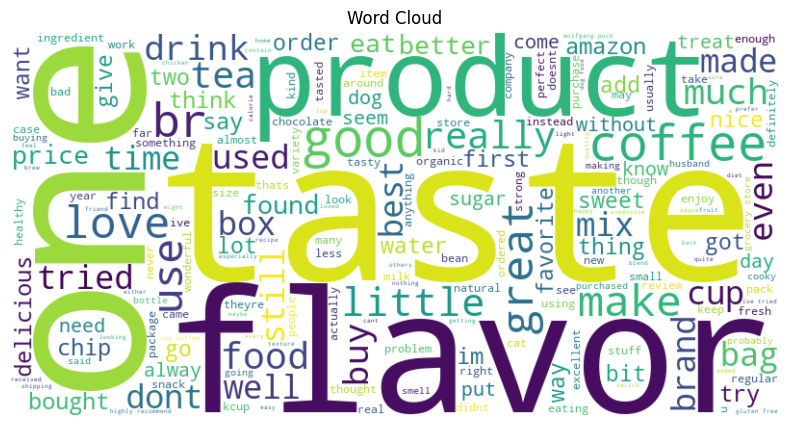

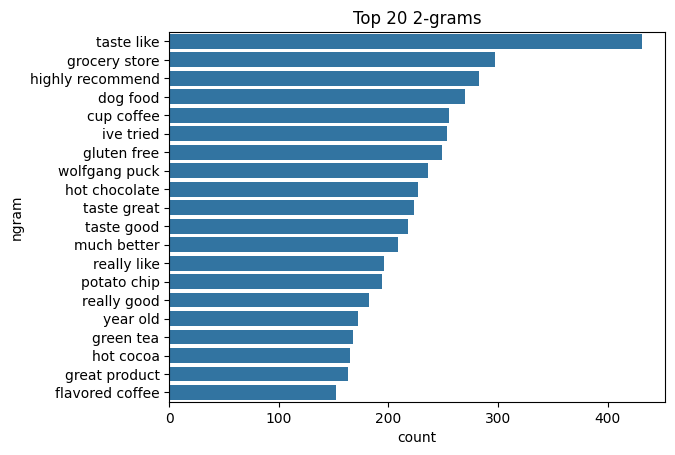

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...


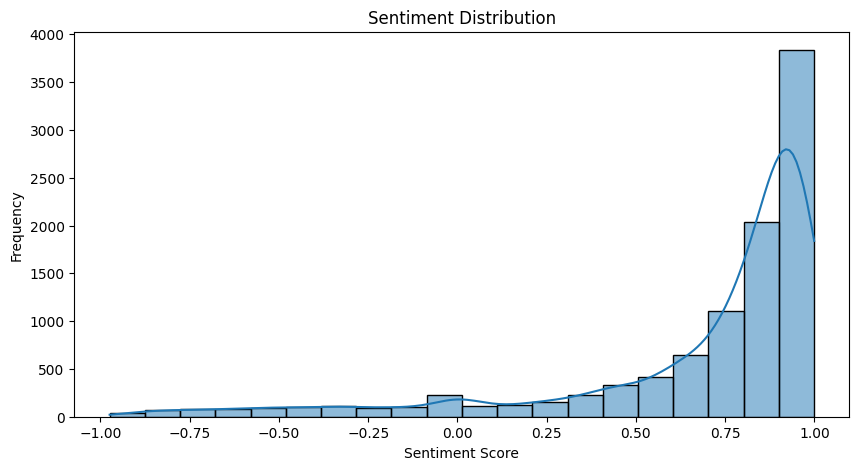

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Generate n-gram frequency plots
def plot_ngrams(text, n=2, top_k=20):
    ngrams = Counter([' '.join(words) for words in zip(*[text.split()[i:] for i in range(n)])])
    common_ngrams = ngrams.most_common(top_k)
    
    ngram_df = pd.DataFrame(common_ngrams, columns=['ngram', 'count'])
    sns.barplot(x='count', y='ngram', data=ngram_df)
    plt.title(f'Top {top_k} {n}-grams')
    plt.show()

# Plot top bigrams
plot_ngrams(' '.join(df['cleaned_text']), n=2)

# Sentiment distribution graph
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda text: sia.polarity_scores(text)['compound'])
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display feature names
print("Top 20 Bag of Words Features: ", bow_vectorizer.get_feature_names_out()[:20])
print("Top 20 TF-IDF Features: ", tfidf_vectorizer.get_feature_names_out()[:20])


Top 20 Bag of Words Features:  ['ability' 'able' 'abr' 'absence' 'absolute' 'absolutely' 'absorb'
 'absorbed' 'acacia' 'acai' 'accept' 'acceptable' 'access' 'accessible'
 'accident' 'accidentally' 'accomplish' 'according' 'account' 'accurate']
Top 20 TF-IDF Features:  ['ability' 'able' 'abr' 'absence' 'absolute' 'absolutely' 'absorb'
 'absorbed' 'acacia' 'acai' 'accept' 'acceptable' 'access' 'accessible'
 'accident' 'accidentally' 'accomplish' 'according' 'account' 'accurate']
